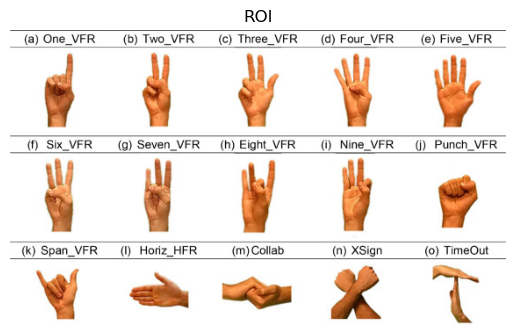

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

cnt = None
defects = None
fingers = 0

roi = cv2.imread("hands.jpg")
roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
plt.imshow(roi_rgb)
plt.title("ROI")
plt.axis("off")  
plt.show()

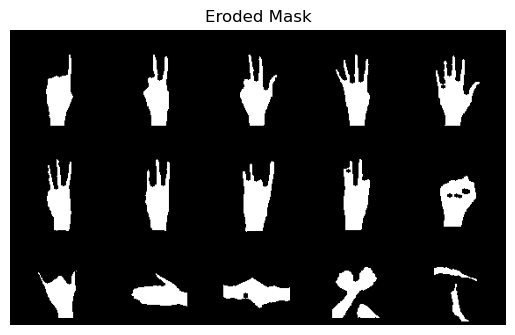

In [2]:
lower_skin = np.array([0, 20, 70], np.uint8)
upper_skin = np.array([20, 255, 255], np.uint8)

hsv = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, lower_skin, upper_skin)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
mask_eroded = cv2.erode(mask, kernel, iterations=1)
plt.imshow(mask_eroded, cmap='gray')
plt.title("Eroded Mask")
plt.axis("off")  
plt.show()

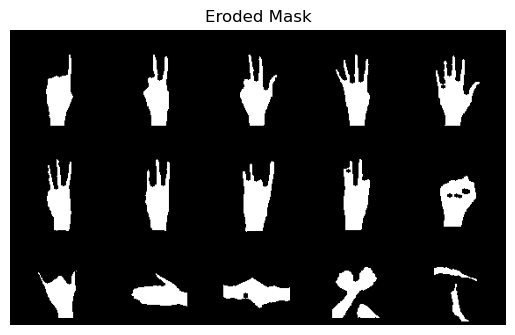

In [3]:
mask_eroded2 = cv2.erode(mask_eroded, kernel, iterations=2)
mask_dilate = cv2.dilate(mask_eroded2, kernel, iterations=2)
plt.imshow(mask_eroded, cmap='gray')
plt.title("Eroded Mask")
plt.axis("off")  
plt.show()

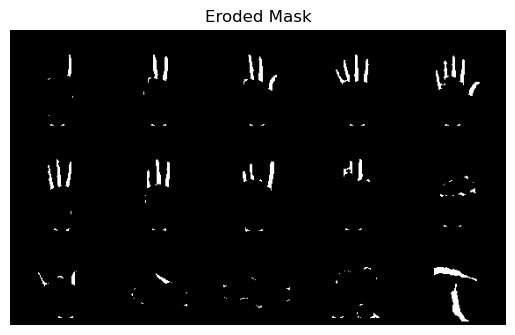

In [6]:
diff_mask = cv2.absdiff(mask_eroded, mask_dilate) 
plt.imshow(diff_mask, cmap='gray')
plt.title("Eroded Mask")
plt.axis("off")  
plt.show() 

In [7]:
contours, _ = cv2.findContours(diff_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_contours = 0
for c in contours:
    if cv2.contourArea(c)>20:
        num_contours += 1
print(f"Number of remaining contours: {num_contours}")

Number of remaining contours: 29
